In [14]:
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.gridspec import GridSpec


# Curve Fitting:

## $M_{BH} - \sigma_{*}$ Relation

In 2006, Greene and Ho [1] studied the characteristics of 88 galaxies to show that there is an apparent relationship between the stellar velocity dispersion$\sigma_{*}$ in a galaxy bulge and the mass $M_{HB}$ of the supermassive black hole at its center, as show in the next figure

<img src="figure1.png">

This know as the $M_{BH}-\sigma_{*}$ relation and is not yet completely understood.

* Make a plot of point showing $log_{10} M_{BH}$ as a function of $log_{10}\sigma_{*}$



Text(0,0.5,'N')

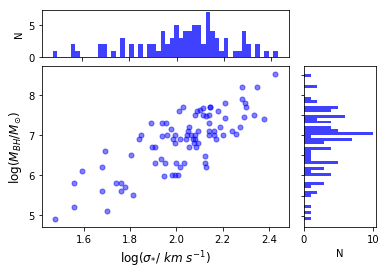

In [86]:
data = ascii.read("table1.dat",readme="ReadMe")  
logσ = np.array(np.log10(data["sigma*"]))
logM = np.array(data["logM"])

x = logσ; y = logM

fig = plt.figure()

gs = GridSpec(4,4)

ax_joint = fig.add_subplot(gs[1:4,0:3])
ax_marg_x = fig.add_subplot(gs[0,0:3])
ax_marg_y = fig.add_subplot(gs[1:4,3])

ax_joint.scatter(x,y, c = "blue",alpha = 0.5,s = 25)
ax_marg_x.hist(x,50,facecolor = "blue",alpha = 0.75)
ax_marg_y.hist(y,50,facecolor = "blue",alpha = 0.75,orientation="horizontal")

plt.setp(ax_marg_x.get_xticklabels(), visible=False)
plt.setp(ax_marg_y.get_yticklabels(), visible=False)

ax_joint.set_xlabel('$\log(\sigma_{*}/\ km\ s^{-1})$',fontsize= "12")
ax_joint.set_ylabel('$\log(M_{BH}/M_{\odot})$',fontsize= "12")

ax_marg_y.set_xlabel('N')
ax_marg_x.set_ylabel('N')


In [92]:
data

Name,z,sigma*,e_sigma*,n_sigma*,FWHM,e_FWHM,logL,e_logL,logM,E_logM,e_logM
,,km / s,km / s,,km / s,km / s,[10-7W],[10-7W],[solMass],[solMass],[solMass]
str24,float64,float64,float64,str1,int64,int64,float64,float64,float64,float64,float64
SDSS J000805.62+145023.4,0.0454,140.0,27.0,--,7610,380,41.13,0.04,7.7,--,0.1
SDSS J004236.86-104921.8,0.0419,78.4,10.0,--,1960,97,41.58,0.14,6.7,--,0.1
SDSS J011703.58+000027.3,0.0456,98.8,16.0,--,2270,110,41.45,0.08,6.8,--,0.1
SDSS J020459.25-080816.0,0.0772,121.0,9.4,a,3720,180,41.13,0.05,7.0,--,0.1
SDSS J020615.99-001729.1,0.0426,216.0,30.0,--,3860,190,41.91,0.07,7.5,--,0.1
SDSS J021011.49-090335.5,0.0414,122.0,12.0,a,2450,120,41.24,0.07,6.7,--,0.1
SDSS J021257.59+140610.1,0.0618,174.0,12.0,a,3080,150,41.58,0.06,7.1,--,0.1
SDSS J033013.26-053236.0,0.0131,99.2,11.0,--,5160,250,40.45,0.06,7.0,--,0.1


* Compute a linear regression to the data (Ignoring errors). Make a plot of data and fit. Compare your fit results to that of Greene & Ho (2006). (Maybe you will need some rescaling for a direct comparison.)

The simplest curve to fit some data is a straight line (linnear regression)

$$Y(x,\{a_{1},a_{2}\}) = a_{1}+a_{2}x$$

the coefficients of the linear regression are 

$$a_{1} = \frac{\sum y \sum x^{2}-\sum x \sum xy}{S \sum x^{2}-\left(\sum x\right)^{2}},\qquad a_{2} = \frac{S\sum xy- \sum y \sum x}{S\sum x^{2}-\left(\sum x\right)^{2}}$$

The associated error bar $\sigma^{2}_{a_{j}}$ for the curve fit parameter $a_{j}$. We have

$$\sigma_{a_{1}} = \sqrt{\frac{\sum x^{2}}{S\sum x^{2}-\left(\sum x\right)^{2}}},\qquad \sigma_{a_{2}} = \sqrt{\frac{S}{S\sum x^{2}-\left(\sum x\right)^{2}}}$$

with the definitions 

$$S=\sum_{i=1}^{N}\frac{1}{\sigma_{i}^{2}},\quad \sum x=\sum_{i=1}^{N}\frac{x_{i}}{\sigma_{i}^{2}},\quad  \sum y=\sum_{i=1}^{N}\frac{y_{i}}{\sigma_{i=1}\frac{y_{i}}{\sigma_{i}^{2}}}$$

$$\sum x^{2} = \sum_{i=1}^{N}\frac{x_{i}^{2}}{\sigma_{i}^{2}},\quad \sum xy = \sum_{i=1}^{N}\frac{x_{i}y_{i}}{\sigma_{i}^{2}}$$

In [89]:
%cat ReadMe


J/ApJ/641/L21  Black hole mass and velocity dispersion relation  (Greene+, 2006)
The M_BH_-{sigma}_*_ relation in local active galaxies.
    Greene J.E., Ho L.C.
   <Astrophys. J., 641, L21-L24 (2006)>
   =2006ApJ...641L..21G
ADC_Keywords: Active gal. nuclei ; Velocity dispersion ; Redshifts
Keywords: galaxies: active - galaxies: kinematics and dynamics -
          galaxies: nuclei - galaxies: Seyfert

Abstract:
    We examine whether active galaxies obey the same relation between
    black hole mass and stellar velocity dispersion as inactive systems,
    using the largest published sample of velocity dispersions for active
    nuclei to date. The combination of 56 original measurements with
    objects from the literature not only increases the sample from the 15
    considered previously to 88 objects but allows us to cover an
    unprecedented range in both stellar velocity dispersion (30-268km/s)
    and black hole mass (10^5^-10^8.6^M_{sun}_).

File Summary:
---------------------

In [91]:
data

Name,z,sigma*,e_sigma*,n_sigma*,FWHM,e_FWHM,logL,e_logL,logM,E_logM,e_logM
,,km / s,km / s,,km / s,km / s,[10-7W],[10-7W],[solMass],[solMass],[solMass]
str24,float64,float64,float64,str1,int64,int64,float64,float64,float64,float64,float64
SDSS J000805.62+145023.4,0.0454,140.0,27.0,--,7610,380,41.13,0.04,7.7,--,0.1
SDSS J004236.86-104921.8,0.0419,78.4,10.0,--,1960,97,41.58,0.14,6.7,--,0.1
SDSS J011703.58+000027.3,0.0456,98.8,16.0,--,2270,110,41.45,0.08,6.8,--,0.1
SDSS J020459.25-080816.0,0.0772,121.0,9.4,a,3720,180,41.13,0.05,7.0,--,0.1
SDSS J020615.99-001729.1,0.0426,216.0,30.0,--,3860,190,41.91,0.07,7.5,--,0.1
SDSS J021011.49-090335.5,0.0414,122.0,12.0,a,2450,120,41.24,0.07,6.7,--,0.1
SDSS J021257.59+140610.1,0.0618,174.0,12.0,a,3080,150,41.58,0.06,7.1,--,0.1
SDSS J033013.26-053236.0,0.0131,99.2,11.0,--,5160,250,40.45,0.06,7.0,--,0.1


* Include the errors in $log_{10}\sigma_{*}$ and $log_{10}M_{BH}$ in your fit. There may be multiple errors given, use your judgement which ones to pick. How does this change your fit?